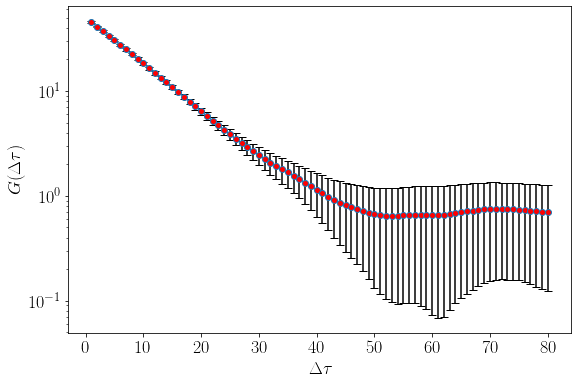

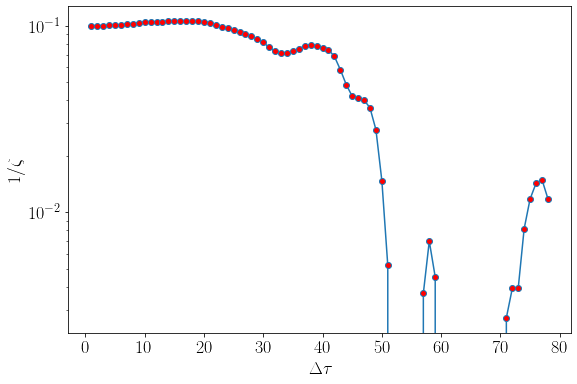

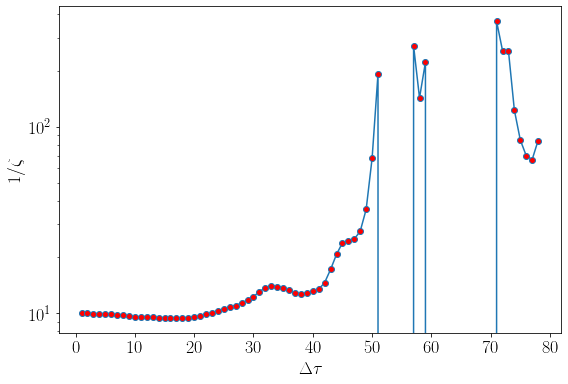

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# f="correlation_N_t1500_m0.080000.dat"
# A=np.loadtxt(f)
# a=np.mean(A,axis=0)
# err=np.std(A,axis=0)/np.sqrt(a.size)
# t=range(1,a.size+1)
# t=np.array(t)
# plt.errorbar(t,a,yerr=err,marker="o")
plt.figure(figsize=(9,6))
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.size'] = 18
f="correlation_N_t1200_m0.100000.dat"
A=np.loadtxt(f)
A=A[1000:,:]
a=np.mean(A,axis=0)
err=np.std(A,axis=0)/np.sqrt(a.size)
t=range(1,a.size+1)
t=np.array(t)
plt.errorbar(t,a,yerr=err,marker="o",capsize=4,mfc='r',ecolor='k')
plt.yscale("log")
plt.ylabel("$G(\\Delta \\tau)$",fontsize=18)
plt.xlabel("$\\Delta \\tau$",fontsize=18)
plt.savefig("correlation.pdf")
plt.show()


plt.figure(figsize=(9,6))
corr=np.zeros(a.size-2)
xx=[]
for i in range(1,a.size-1):
    corr[i-1]=0.5*np.log(a[i-1]/a[i+1])
    xx.append(i)

plt.plot(xx,corr,marker="o",mfc='r')
plt.yscale("log")
plt.ylabel("$1/\\zeta$",fontsize=18)
plt.xlabel("$\\Delta \\tau$",fontsize=18)
plt.savefig("effective_mass.pdf")
plt.show()

plt.figure(figsize=(9,6))
corr=np.zeros(a.size-2)
xx=[]
for i in range(1,a.size-1):
    corr[i-1]=0.5*np.log(a[i-1]/a[i+1])
    xx.append(i)

plt.plot(xx,1/corr,marker="o",mfc='r')
plt.yscale("log")
plt.ylabel("$1/\\zeta$",fontsize=18)
plt.xlabel("$\\Delta \\tau$",fontsize=18)
plt.savefig("correlation_length.pdf")
plt.show()

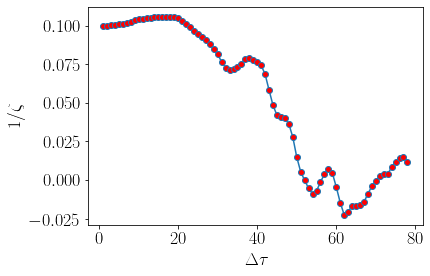

In [55]:


corr=np.zeros(a.size-2)
xx=[]
for i in range(1,a.size-1):
    corr[i-1]=0.5*np.log(a[i-1]/a[i+1])
    xx.append(i)

plt.plot(xx,corr,marker="o",mfc='r')

plt.ylabel("$1/\\zeta$",fontsize=18)
plt.xlabel("$\\Delta \\tau$",fontsize=18)
plt.show()

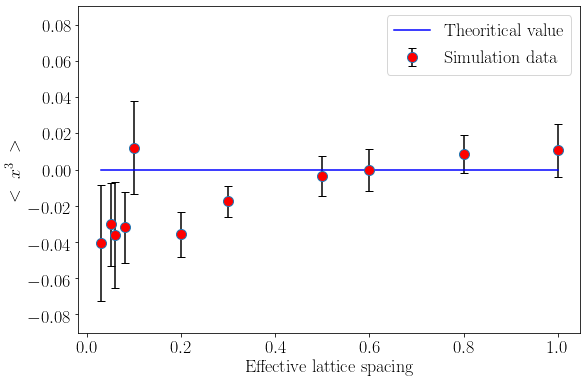

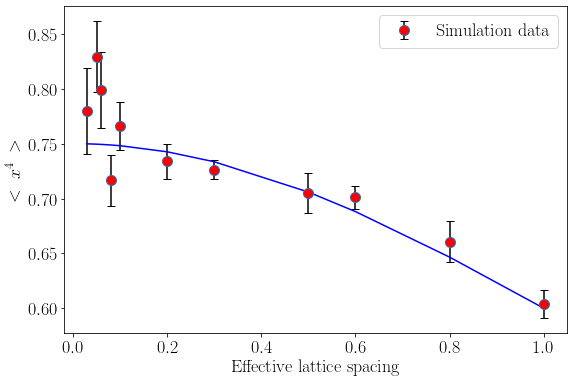

In [15]:
import numpy as np
import matplotlib.pyplot as plt

L=[120,150,200,240,400,600,1200,1500,2000,2400,4000]
m=[1,0.8,0.6,0.5,0.3,0.2,0.1,0.08,0.06,0.05,0.03]
x2m=[]
x3m=[]
x4m=[]
ex2m=[]
ex3m=[]
ex4m=[]
f="scalar_N_t%d_m%0.6f.dat"%(L[0],m[0])
for i,j in enumerate(L):
    f="scalar_N_t%d_m%0.6f.dat"%(L[i],m[i])
    A=np.loadtxt(f,skiprows=3)
    x2=A[:,1]
    x3=A[:,2]
    x4=A[:,3]
    Ex2=np.mean(x2)
    Ex3=np.mean(x3)
    Ex4=np.mean(x4)
    x2m.append(Ex2)
    x3m.append(Ex3)
    x4m.append(Ex4)
    "Jack Knife bins=16"
    nb=16
    jx2=np.zeros(16)
    jx3=np.zeros(16)
    jx4=np.zeros(16)
    
    for k in range(16):
        index=np.ones(x2.size)
        index[11*k:11*(k+1)]=0
#         print(index)
        jx2[k]=np.sum(x2*index)/165
        jx3[k]=np.sum(x3*index)/165
        jx4[k]=np.sum(x4*index)/165
    
    ex2m.append(np.sqrt(np.sum((jx2-Ex2)**2)*(15/16)))
    ex3m.append(np.sqrt(np.sum((jx3-Ex3)**2)*(15/16)))
    ex4m.append(np.sqrt(np.sum((jx4-Ex4)**2)*(15/16)))
    
# plt.plot(m,x2m,"o")
plt.figure(figsize=(9,6))
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.size'] = 18
plt.errorbar(m,x3m,yerr=ex3m,marker="o",ls="None",capsize=4,mfc="r",ecolor='k',markersize=10,label="$\mathrm{Simulation\\; data}$")
plt.plot(m,np.zeros(len(m)),color="b",label="$\mathrm{Theoritical\\;value}$")
plt.ylabel("$<\\;x^3\\; >$",fontsize=18)
plt.xlabel("$\mathrm{Effective \\;lattice \\;spacing}$",fontsize=18)
plt.yticks([0.02,0.04,0.06,0.08,-0.02,-0.04,-0.06,-0.08,0.00])
plt.ylim(-0.09,0.09)
plt.legend()
plt.savefig("x3.pdf")

def avg_x4(m,L):
    m=np.array(m)
    ans=1/(2*m*m*np.sqrt(1+m*m*0.25))
    R=1+0.5*m**2-m*np.sqrt(1+m*m*0.5)
    ans=m*m*ans
    ans=ans*(1+R**L)
    ans=ans/(1-R**L)
    return(3*ans**2)

plt.figure(figsize=(9,6))
plt.errorbar(m,x4m,yerr=ex4m,marker="o",ls="None",capsize=4,mfc="r",ecolor='k',markersize=10,label="$\mathrm{Simulation\\; data}$")
x=np.arange(0.,1,0.01)
plt.plot(m,avg_x4(m,L),color="b")
plt.ylabel("$<\\;x^4\\; >$",fontsize=18)
plt.xlabel("$\mathrm{Effective \\;lattice \\;spacing}$",fontsize=18)
# plt.yticks([0.02,0.04,0.06,0.08,-0.02,-0.04,-0.06,-0.08,0.00])

plt.legend()
plt.savefig("x4.pdf")